# Derivatives Stability Testing

Here we showcase the stability of derivatives using the "stem" method described in the paper.
We first show the stability by plotting covariances for Fisher matrices where the source galaxy sample has different resolution of the redshift range.

When the derivatives are calculated using the standard finite difference method (using `numdifftools`package), we noticed instabilites that propagate into the data vector, and ultimately, into the Fisher matrix. The source of instabilites might be coming from the combination of the finite difference method and the potential instabilites in the calculation of the data vector using `pyccl`.

In order to ensure the stability of the derivatives, we opted for a different method to calculate the derivatives. The method is described in detail in the paper and an example can be found on [this GitHub repository](https://github.com/nikosarcevic/Derivative-Calculator).

We first show the stability by plotting covariances for Fisher matrices where the source galaxy sample has different resolution of the redshift range. It can be seen that the differences in the tightnes of the contours are negligible.

Next, we compare the Fisher matrices calculated using the "stem" method and also the optino where the derivative matrix was pertubed. The pertubation was done by adding a small number to the derivative matrix. The comparison shows that the differences in the Fisher matrices are again negligible.


In [1]:
from getdist import plots
import numpy as np
import matplotlib.pyplot as plt
from processing import gaussians_stability_processing as gsp
from processing import helpers as h

In [2]:
corner_path = "jmas_data/corner_plot_data/"
parameters = np.load(f"{corner_path}corner_plot_parameters.npy",
                     allow_pickle=True).item()
gaussians_stem = gsp.gaussians_stem
gaussians_pert = gsp.gaussians_pert
corner_colors = h.corner_colors

plots_path = f"plots_output/corner_plots/"
gdplot = h.gdplot

## Resolutions Comparison

CPU times: user 4min 5s, sys: 33.8 s, total: 4min 39s
Wall time: 1min 56s


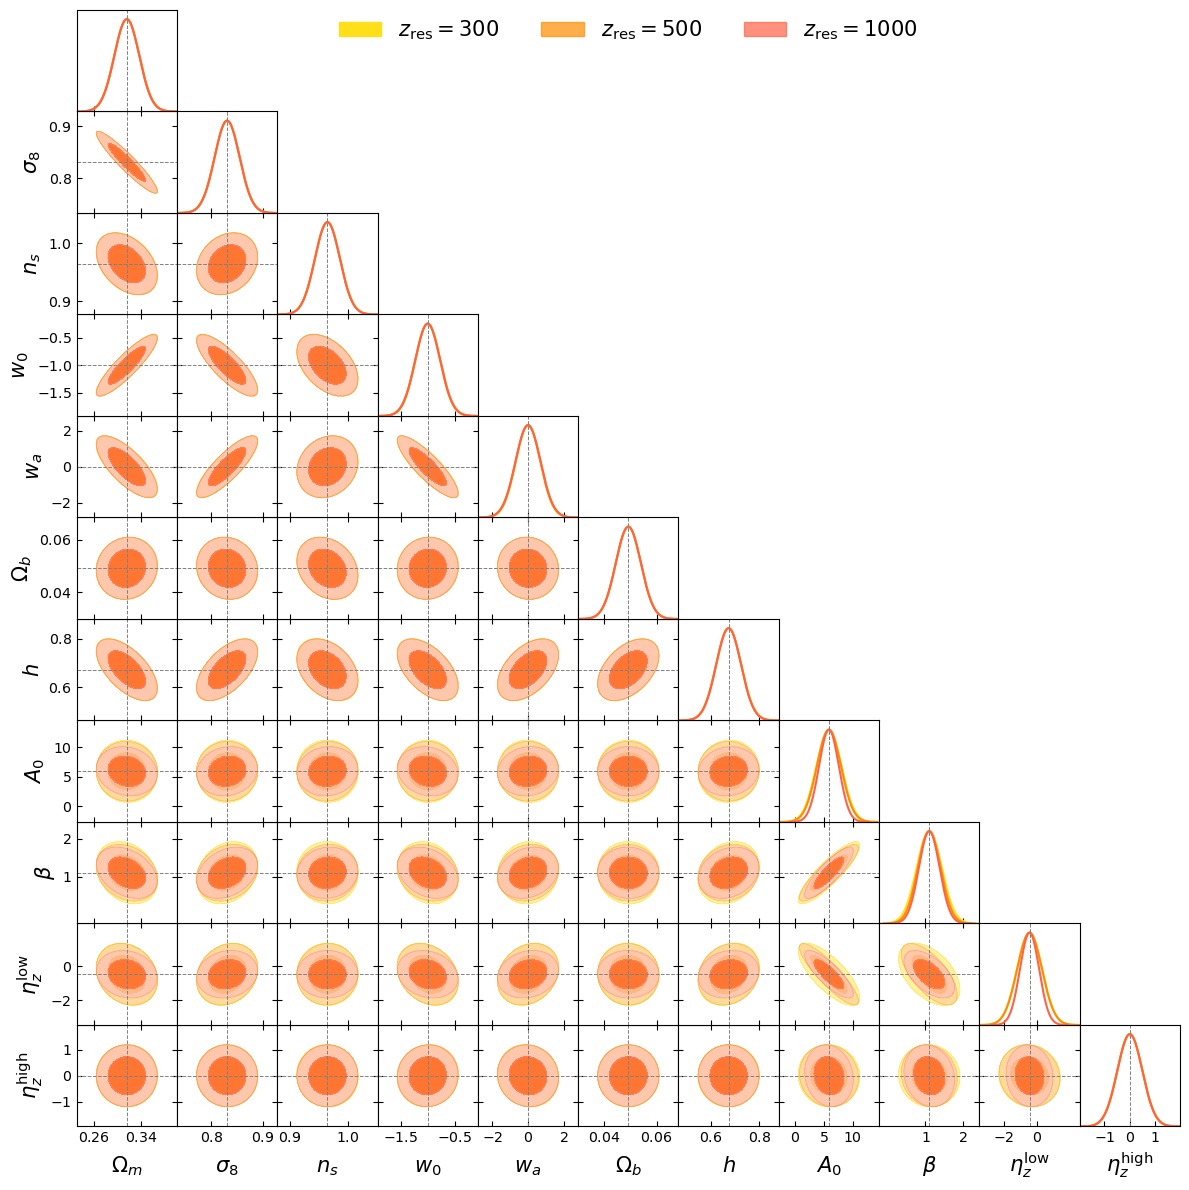

In [3]:
%%time

legend_labels = ["$z_{\\mathrm{res}}=300$",
                 "$z_{\\mathrm{res}}=500$",
                 "$z_{\\mathrm{res}}=1000$",]

lower_kwargs = {'contour_colors': ["#ffde1a", "darkorange", "tomato"],
                "filled":[True, True, True],
                "contour_ls":["-", "-", "-"],
                "contour_lws":[1.5, 1.5, 1.5],}

lower_covmats = [gaussians_stem["srd"]["res300"]["cosmoia"]["1"],
                 gaussians_stem["srd"]["res500"]["cosmoia"]["1"],
                 gaussians_stem["srd"]["res1000"]["cosmoia"]["1"],]

gdplot.triangle_plot(lower_covmats,
                legend_labels=legend_labels,
                legend_ncol=3,
                markers=parameters["values"]["srd"]["cosmoia"]["1"],
                **lower_kwargs)

plt.gcf().set_size_inches(12, 12) 

plt.savefig(f"{plots_path}stem_comparison_y1_300_500_1000.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}stem_comparison_y1_300_500_1000..png", bbox_inches="tight", dpi=300)


## Pertubation Comparison

CPU times: user 3min 29s, sys: 13.3 s, total: 3min 42s
Wall time: 1min 15s


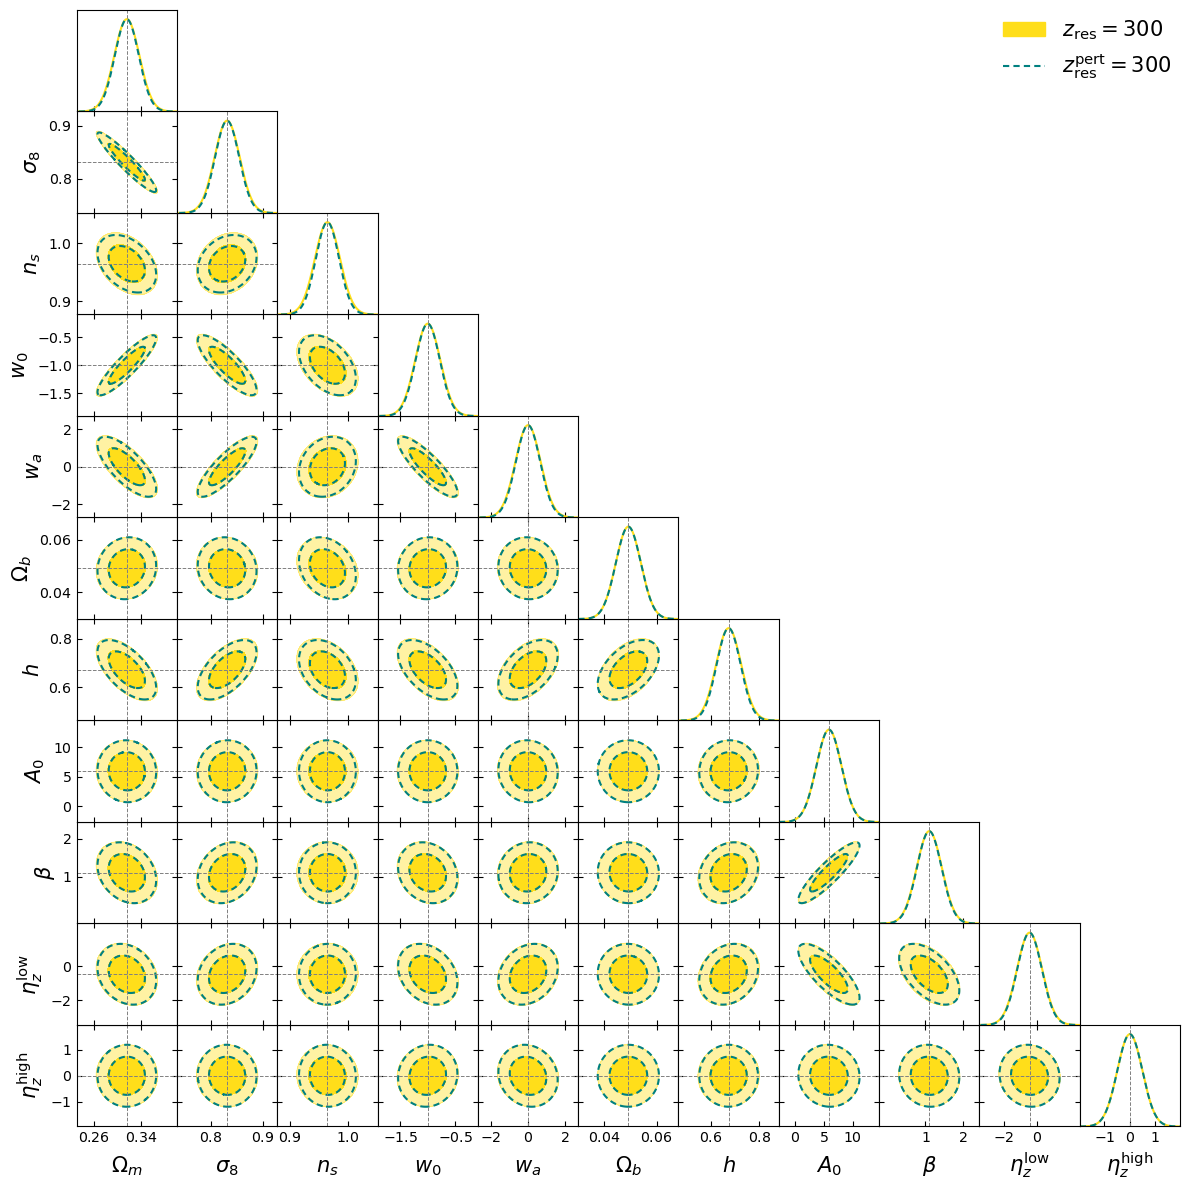

In [4]:
%%time

lower_kwargs = {"filled":[True, False],
                "contour_ls":["-", "--",],
                "contour_lws":[1.5, 1.5],
                "contour_colors":["#ffde1a", "teal",],
                "legend_loc":"upper right",
                "legend_rect_border":False}

legend_labels = ["$z_{\\mathrm{res}}=300$",
                 "$z_{\\mathrm{res}}^{\\mathrm{pert}}=300$"]

lower_covmats = [gaussians_stem["srd"]["res300"]["cosmoia"]["1"],
                 gaussians_pert["srd"]["cosmoia"]["1"],]

gdplot.triangle_plot(lower_covmats,
                legend_labels=legend_labels,
                legend_ncol=1,
                markers=parameters["values"]["srd"]["cosmoia"]["1"],
                **lower_kwargs)

plt.gcf().set_facecolor("white")
plt.gcf().set_size_inches(12, 12) 

plt.savefig(f"{plots_path}stem_comparison_y1_300vs300pert.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}stem_comparison_y1_300vs300pert.png", bbox_inches="tight", dpi=300)
